In [1]:
#importing our lovely packages
# import ugradio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

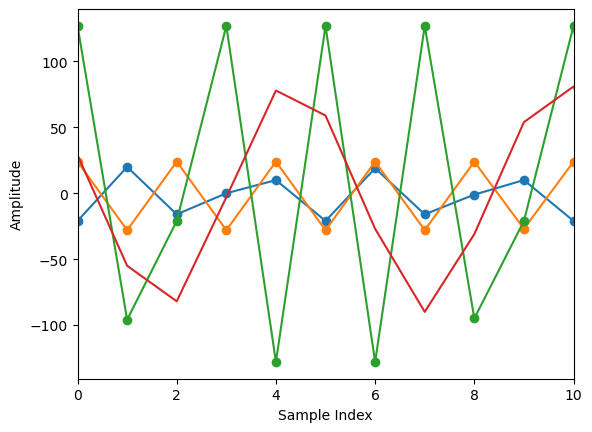

In [3]:
# Signal frequency = 600 kHz
# Amplitude = 100 mV_pp

#unit conversion 
# fs_below = 1.0e6        # below Nyquist
# fs_ny = 1.2e6           # at Nyquist
# fs_above = 1.4e6        # above Nyquist
# fs_way_above = 3.2e6    # way above Nyquist

# N = len(data_below_lim_600khz[7])

# t_below = np.arange(N) / fs_below
# t_ny = np.arange(N) / fs_ny
# t_above = np.arange(N) / fs_above
# t_way_above = np.arange(N) / fs_way_above

# Below Nyquist limit (aliasing) = 1e6
below_lim_600khz = np.load("below_lim_600khz.npz")
data_below_lim_600khz = below_lim_600khz["arr_0"]



# At Nyquist limit = 1.2e6
ny_lim_600khz = np.load("ny_lim_600khz.npz")
data_ny_lim_600khz = ny_lim_600khz["arr_0"]



# Above Nyquist Limit (clean) = 1.4e6 
above_lim_600khz = np.load("above_lim_600khz.npz")
data_above_lim_600khz = above_lim_600khz["arr_0"]



# Way Above Nyquist Limit (clean) = 3.2e6 
way_above_lim_600khz = np.load("way_above_lim_600khz.npz")
data_way_above_lim_600khz = way_above_lim_600khz["arr_0"]

#Fourier Transforms
ft_below600 = np.fft.fft(data_below_lim_600khz)
ft_atlim600 = np.fft.fft(data_ny_lim_600khz)
ft_above600 = np.fft.fft(data_above_lim_600khz)
ft_wayabove600 = np.fft.fft(data_way_above_lim_600khz)


# Plotting all three together
plt.figure()
plt.plot(data_below_lim_600khz[7], marker = "o") #blue, aliased
plt.plot(data_ny_lim_600khz[7], marker = "o") #orange, at limit
plt.plot(data_above_lim_600khz[7], marker = "o") #green, clean
plt.plot(data_way_above_lim_600khz[7]) #red, clean
plt.xlim(0,10)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()



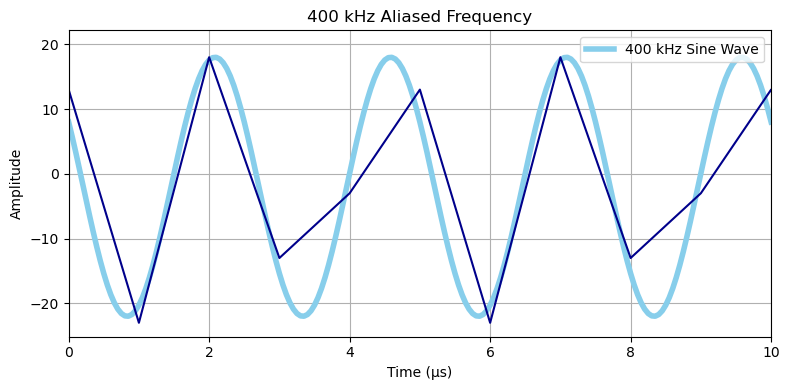

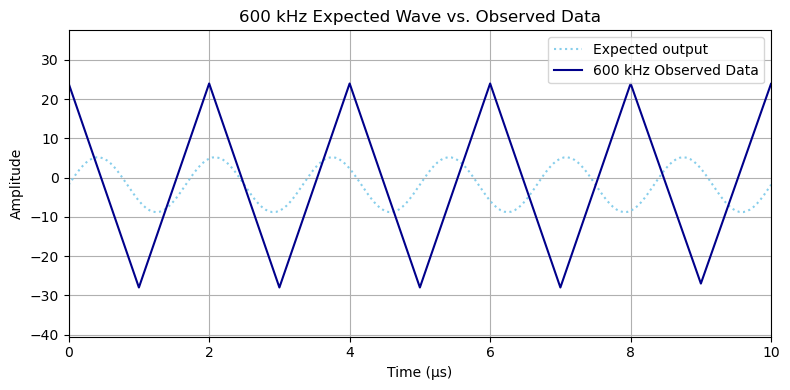

In [17]:
# Plotting Observed vs. Expected Sine Waves


# Expected output of clean but aliased 600 kHz
# Parameters
frequency = 400e3       # expected based off calculation for aliased frequency above
amplitude = 20          # ±20
sampling_rate = 20e6    # 20 MHz sampling rate for smooth plot
duration = 10e-6         # 10 microseconds (enough to see a few cycles)

# Time vector
t = np.arange(0, duration, 1/sampling_rate)

# Sine wave generation
y_aliased = amplitude * np.sin(2 * np.pi * frequency * t + (5*np.pi)/6) - 2


# 600 kHz Data

# Expected output of 600 kHz clean and not aliased
# Clean, normal600 kHz
# Parameters
frequency_atlim = 600e3       # expected based off calculations above
amplitude_atlim = 7          # ±20
sampling_rate_atlim = 20e6    # 20 MHz sampling rate for smooth plot
duration_atlim = 10e-6         # 10 microseconds (enough to see a few cycles)

# Time vector
t_atlim = np.arange(0, duration_atlim, 1/sampling_rate_atlim)

# Sine wave generation
y_atlim = amplitude_atlim * np.sin(2 * np.pi * frequency_atlim * t_atlim ) - 1.8


# Plot 400 kHz - aliased frequency
plt.figure(figsize=(8, 4))
plt.plot(t * 1e6, y_aliased, 'skyblue', linewidth = 4, label=f'{frequency/1e3:.0f} kHz Sine Wave') # expected aliased frequency
plt.plot(data_below_lim_600khz[5], 'darkblue') 
plt.xlim(0,10)
plt.title('400 kHz Aliased Frequency')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Plot 600 kHz observed vs. expected frequency
plt.figure(figsize=(8, 4))
plt.plot(t_atlim * 1e6, y_atlim, 'skyblue', label="Expected output", linestyle="dotted")
plt.plot(data_ny_lim_600khz[7], 'darkblue', label="600 kHz Observed Data")
plt.xlim(0, 10)
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("600 kHz Expected Wave vs. Observed Data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Looking into fft shifting data and see if that does anything to these. If you have time. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

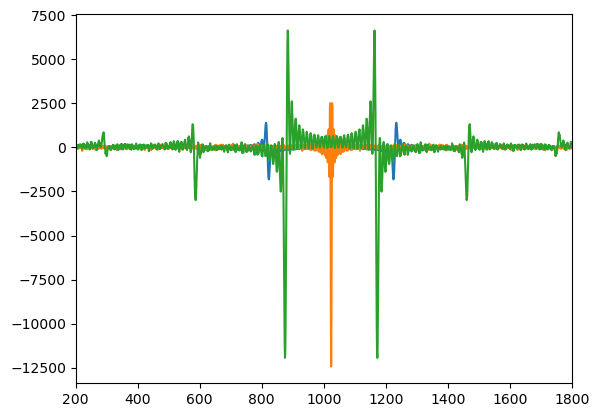

In [20]:

#Fourier Transforms
ft_below600 = np.fft.fft(data_below_lim_600khz[0])
ft_atlim600 = np.fft.fft(data_ny_lim_600khz[0])
ft_above600 = np.fft.fft(data_above_lim_600khz[0])
ft_wayabove600 = np.fft.fft(data_way_above_lim_600khz[0])


#Plotting FTs together
plt.figure()
plt.plot(ft_below600)
plt.plot(ft_atlim600)
plt.plot(ft_above600)
plt.xlim(200,1800)
# plt.yscale("log")
plt.show()

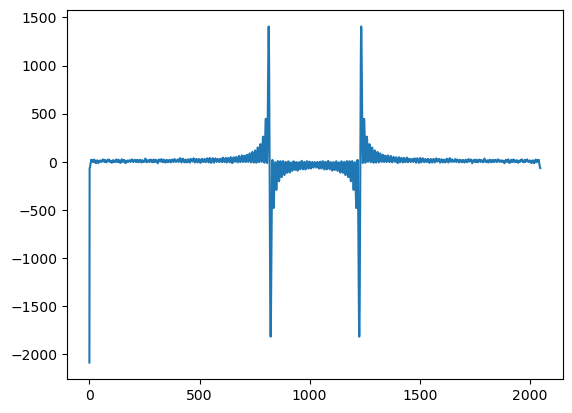

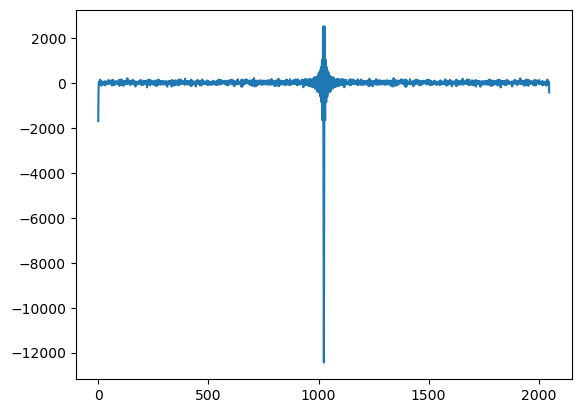

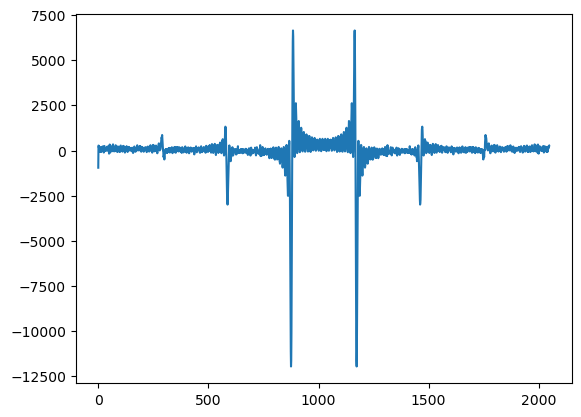

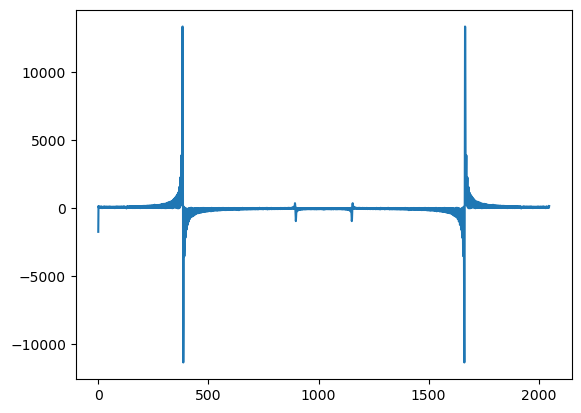

In [18]:
#Fourier Transforms
ft_below600 = np.fft.fft(data_below_lim_600khz[0])
ft_atlim600 = np.fft.fft(data_ny_lim_600khz[0])
ft_above600 = np.fft.fft(data_above_lim_600khz[0])
ft_wayabove600 = np.fft.fft(data_way_above_lim_600khz[0])

lists6001 = [ft_below600,ft_atlim600,ft_above600,ft_wayabove600]

for i in lists6001:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
#     plt.xlim(600,1400)
#     plt.yscale("log")
    plt.show()

#add subplots later

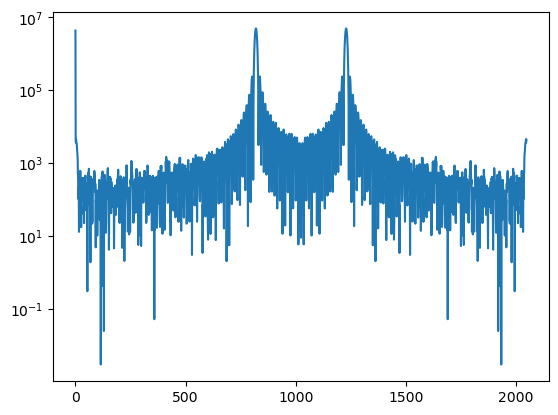

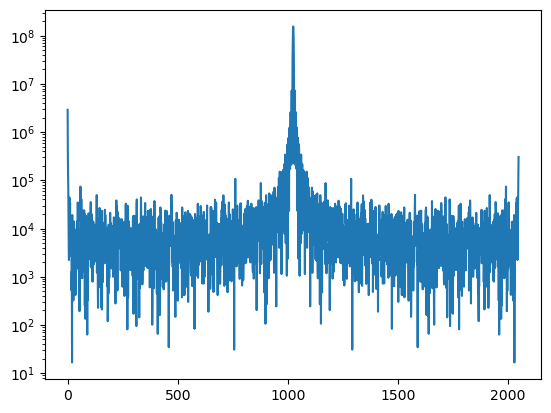

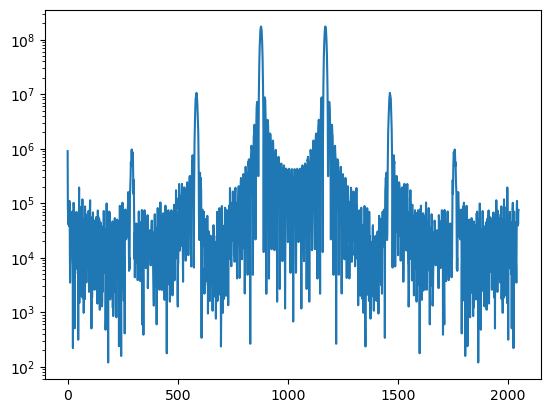

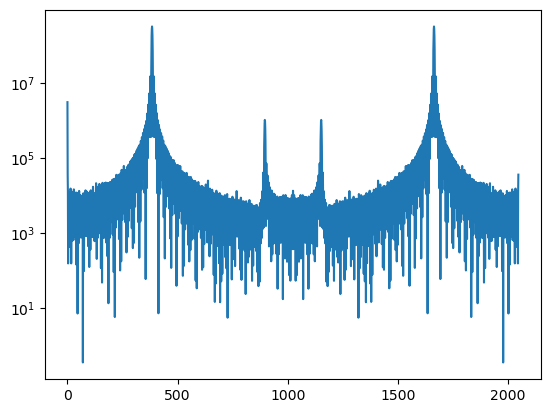

In [16]:
#Power Spectra Plotting

#Fourier Transforms
ft_below600 = np.fft.fft(data_below_lim_600khz[0])
ft_atlim600 = np.fft.fft(data_ny_lim_600khz[0])
ft_above600 = np.fft.fft(data_above_lim_600khz[0])
ft_wayabove600 = np.fft.fft(data_way_above_lim_600khz[0])

below_power600 = np.abs(ft_below600)**2

atlim_power600 = np.abs(ft_atlim600)**2

above_power600 = np.abs(ft_above600)**2

wayabove_power600 = np.abs(ft_wayabove600)**2



lists6002 = [below_power600,atlim_power600,above_power600,wayabove_power600]

for i in lists6002:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
#     plt.xlim(600,1400)
    plt.yscale("log")
    plt.show()

#add subplots later

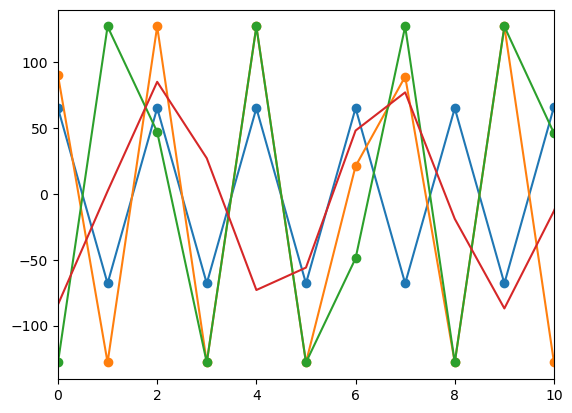

In [7]:
# Signal frequency = 700 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.0e6
below_lim_700khz = np.load("below_lim_700khz.npz")
data_below_lim_700khz = below_lim_700khz["arr_0"]



# At Nyquist limit = 1.4e6
ny_lim_700khz = np.load("ny_lim_700khz.npz")
data_ny_lim_700khz = ny_lim_700khz["arr_0"]



# Above Nyquist Limit (clean) = 2.2e6 
above_lim_700khz = np.load("above_lim_700khz.npz")
data_above_lim_700khz = above_lim_700khz["arr_0"]



# Way Above Nyquist Limit (clean) = 3.2e6 
way_above_lim_700khz = np.load("way_above_lim_700khz.npz")
data_way_above_lim_700khz = way_above_lim_700khz["arr_0"]



# Plotting all three together
plt.figure()
plt.plot(data_below_lim_700khz[7], marker="o") #blue, aliased
plt.plot(data_ny_lim_700khz[7], marker="o") #orange, at limit
plt.plot(data_above_lim_700khz[7], marker="o") #green, clean
plt.plot(data_way_above_lim_700khz[7]) #red, clean
plt.xlim(0,10)
plt.show()



In [89]:

# #Fourier Transforms
# ft_below700 = np.fft.fft(data_below_lim_700khz[0])
# ft_atlim700 = np.fft.fft(data_ny_lim_700khz[0])
# ft_above700 = np.fft.fft(data_above_lim_700khz[0])
# ft_wayabove700 = np.fft.fft(data_way_above_lim_700khz[0])


# #Plotting FTs together
# plt.figure()
# plt.plot(ft_below)
# plt.plot(ft_atlim)
# plt.plot(ft_above)
# plt.xlim(600,1400)
# plt.yscale("log")
# plt.show()

In [5]:
#Fourier Transforms voltage spectra
ft_below700 = np.fft.fft(data_below_lim_700khz[0])
ft_atlim700 = np.fft.fft(data_ny_lim_700khz[0])
ft_above700 = np.fft.fft(data_above_lim_700khz[0])
ft_wayabove700 = np.fft.fft(data_way_above_lim_700khz[0])

lists7001 = [ft_below700,ft_atlim700,ft_above700,ft_wayabove700]

for i in lists7001:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
#     plt.xlim(600,1400)
    plt.yscale("log")
    plt.show()

#add subplots later

NameError: name 'data_below_lim_700khz' is not defined

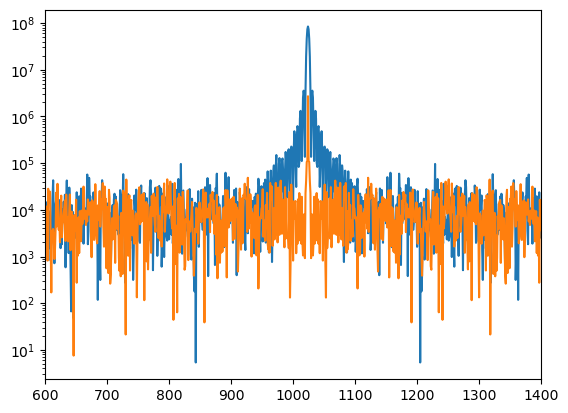

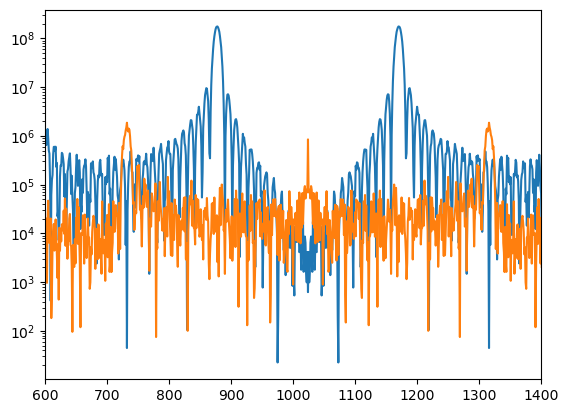

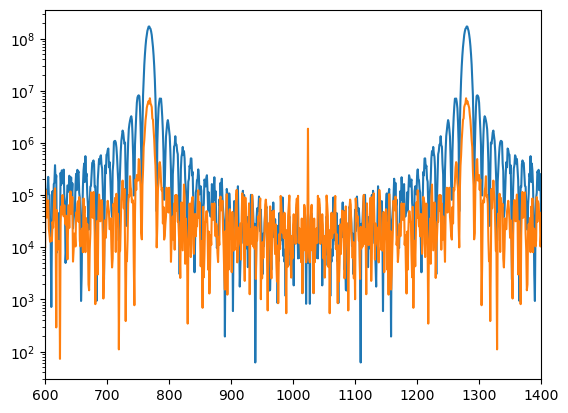

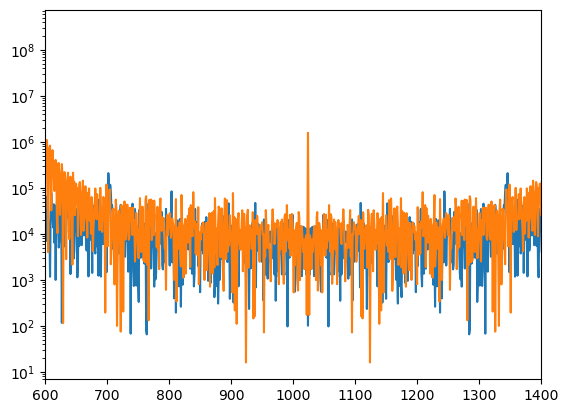

In [20]:
#Fourier Transforms power spectra 
ft_below700 = np.fft.fft(data_below_lim_700khz[0])
ft_atlim700 = np.fft.fft(data_ny_lim_700khz[0])
ft_above700 = np.fft.fft(data_above_lim_700khz[0])
ft_wayabove700 = np.fft.fft(data_way_above_lim_700khz[0])

below_power700 = np.abs(ft_below700)**2

atlim_power700 = np.abs(ft_atlim700)**2

above_power700 = np.abs(ft_above700)**2

wayabove_power700 = np.abs(ft_wayabove700)**2



lists7002 = [below_power700,atlim_power700,above_power700,wayabove_power700]

for i in lists7002:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
    plt.xlim(600,1400)
    plt.yscale("log")
    shifted_fft = np.fft.fftshift(i)
    plt.plot(shifted_fft)
    plt.show()


#add subplots later

#shiffted fft


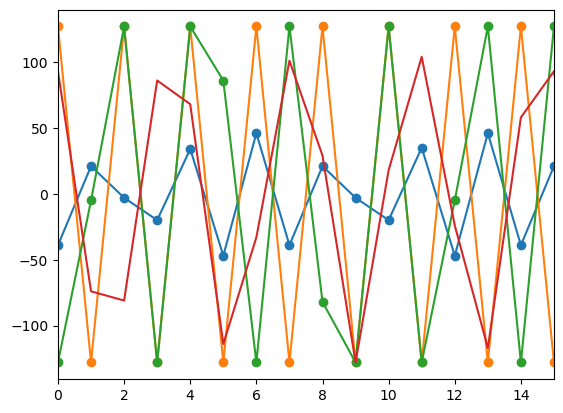

In [10]:
# Signal frequency = 800 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
below_lim_800khz = np.load("below_lim_800khz.npz")
data_below_lim_800khz = below_lim_800khz["arr_0"]



# At Nyquist limit = 1.6e6
ny_lim_800khz = np.load("ny_lim_800khz.npz")
data_ny_lim_800khz = ny_lim_800khz["arr_0"]



# Above Nyquist Limit (clean) = 2.2e6 
above_lim_800khz = np.load("above_lim_800khz.npz")
data_above_lim_800khz = above_lim_800khz["arr_0"]


# Way Above Nyquist Limit (clean) = 2.2e6 
way_above_lim_800khz = np.load("way_above_lim_800khz.npz")
data_way_above_lim_800khz = way_above_lim_800khz["arr_0"]



# Plotting all three together
plt.figure()
plt.plot(data_below_lim_800khz[7], marker="o") #blue, aliased
plt.plot(data_ny_lim_800khz[7], marker="o") #orange, at limit
plt.plot(data_above_lim_800khz[7], marker="o") #green, clean
plt.plot(data_way_above_lim_800khz[7]) #red, clean
plt.xlim(0,15)
plt.show()

In [2]:
#Fourier Transforms voltage spectra
import numpy as np
ft_below800 = np.fft.fft(data_below_lim_800khz[0])
ft_atlim800 = np.fft.fft(data_ny_lim_800khz[0])
ft_above800 = np.fft.fft(data_above_lim_800khz[0])
ft_wayabove800 = np.fft.fft(data_way_above_lim_800khz[0])

lists8001 = [ft_below800,ft_atlim800,ft_above800,ft_wayabove800]

for i in lists8001:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
#     plt.xlim(600,1400)
    plt.yscale("log")
    plt.show()

NameError: name 'data_below_lim_800khz' is not defined

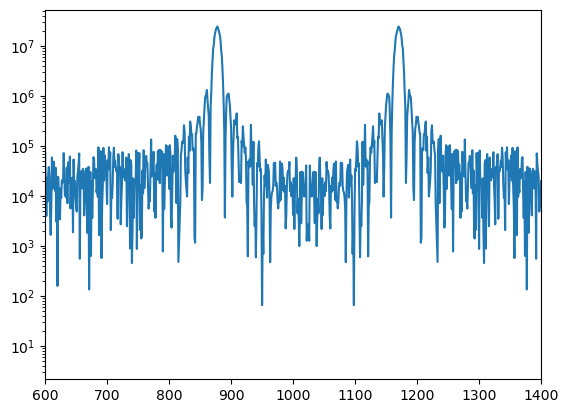

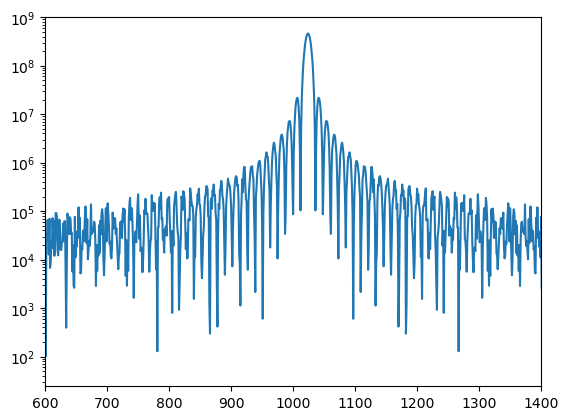

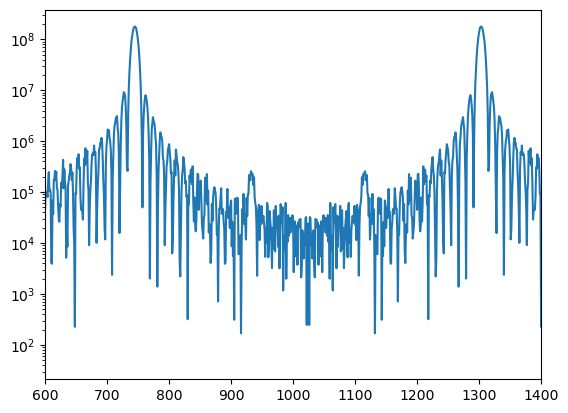

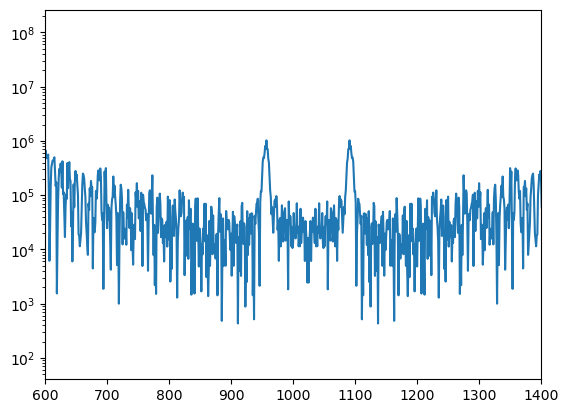

In [11]:
ft_below800 = np.fft.fft(data_below_lim_800khz[0])
ft_atlim800 = np.fft.fft(data_ny_lim_800khz[0])
ft_above800 = np.fft.fft(data_above_lim_800khz[0])
ft_wayabove800 = np.fft.fft(data_way_above_lim_800khz[0])

below_power800 = np.abs(ft_below800)**2

atlim_power800 = np.abs(ft_atlim800)**2

above_power800 = np.abs(ft_above800)**2

wayabove_power800 = np.abs(ft_wayabove800)**2



lists8002 = [below_power800,atlim_power800,above_power800,wayabove_power800]

for i in lists8002:
    #Plotting FTs together
    plt.figure()
    plt.plot(i)
    plt.xlim(600,1400)
    plt.yscale("log")
    plt.show()

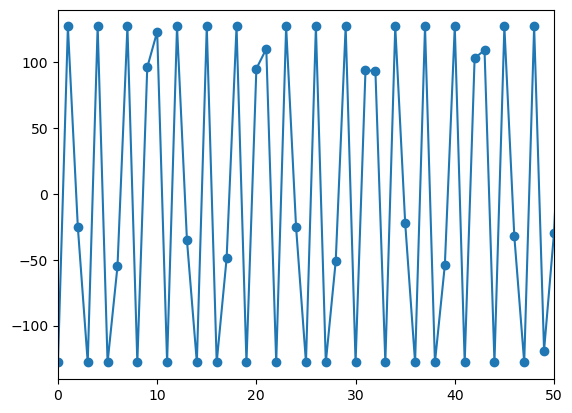

In [12]:
#Testing 10mV amplitude with 800 kHz freq

# Way Above Nyquist Limit (clean) = 2.2e6 
way_above_lim_800khz = np.load("2way_above_lim_800khz.npz")
data_way_above_lim_800khz = way_above_lim_800khz["arr_0"]


plt.figure()
#plt.plot(data_below_lim_800khz[7], marker="o") #blue, aliased
#plt.plot(data_ny_lim_800khz[7], marker="o") #orange, at limit
plt.plot(data_way_above_lim_800khz[7], marker="o") #green, clean
plt.xlim(0,50)
plt.show()
#Testing different voltages for amplitude

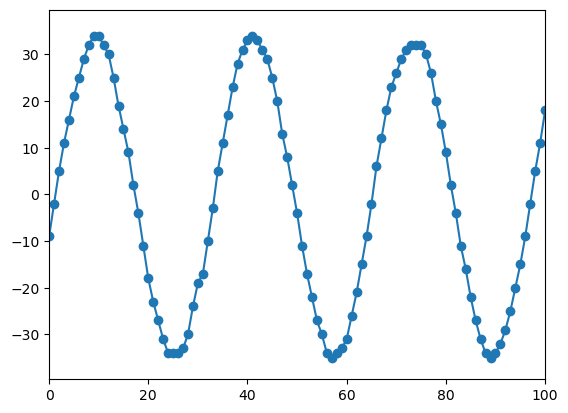

In [13]:


# Way Above Nyquist Limit (clean) = 2.2e6 

# 150 mV
way_above_lim_800khz = np.load("way_above_lim_100khz.npz")
data_way_above_lim_800khz = way_above_lim_800khz["arr_0"]


plt.figure()
#plt.plot(data_below_lim_800khz[7], marker="o") #blue, aliased
#plt.plot(data_ny_lim_800khz[7], marker="o") #orange, at limit
plt.plot(data_way_above_lim_800khz[7], marker="o") #green, clean
plt.xlim(0,100)
plt.show()

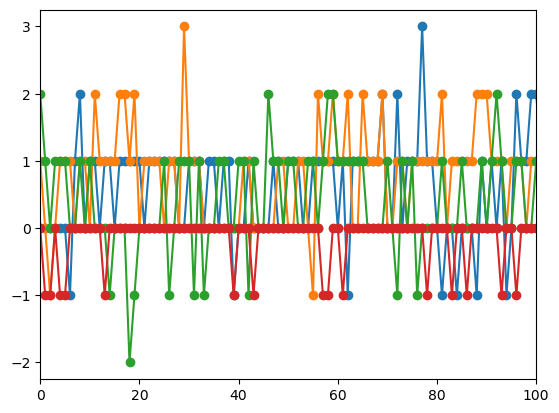

In [7]:
# With Noise (noise generator at level 5)
# Signal frequency = 600 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
Nbelow_lim_600khz = np.load("Nbelow_lim_600khz.npz")
Ndata_below_lim_600khz = Nbelow_lim_600khz["arr_0"]



# At Nyquist limit = 1.6e6
Nny_lim_600khz = np.load("Nny_lim_600khz.npz")
Ndata_ny_lim_600khz = Nny_lim_600khz["arr_0"]



# Above Nyquist Limit (clean) = 2.2e6 
Nabove_lim_600khz = np.load("Nabove_lim_600khz.npz")
Ndata_above_lim_600khz = Nabove_lim_600khz["arr_0"]


# Way Above Nyquist Limit (clean) = 3.2e6 
Nway_above_lim_600khz = np.load("Nway_above_lim_600khz.npz")
Ndata_way_above_lim_600khz = Nway_above_lim_600khz["arr_0"]



# Plotting all three together
plt.figure()
plt.plot(Ndata_below_lim_600khz[7], marker="o") #blue, aliased
plt.plot(Ndata_ny_lim_600khz[7], marker="o") #orange, at limit
plt.plot(Ndata_above_lim_600khz[7], marker="o") #green, clean
plt.plot(Ndata_way_above_lim_600khz[7], marker="o") #red, clean
plt.xlim(0,100)
plt.show()

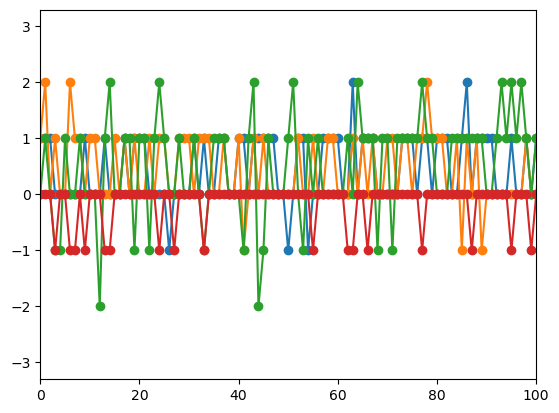

In [6]:
# With Noise (noise generator at level 5)
# Signal frequency = 700 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
Nbelow_lim_700khz = np.load("Nbelow_lim_700khz.npz")
Ndata_below_lim_700khz = Nbelow_lim_700khz["arr_0"]



# At Nyquist limit = 1.6e6
Nny_lim_700khz = np.load("Nny_lim_700khz.npz")
Ndata_ny_lim_700khz = Nny_lim_700khz["arr_0"]



# Above Nyquist Limit (clean) = 2.2e6 
Nabove_lim_700khz = np.load("Nabove_lim_700khz.npz")
Ndata_above_lim_700khz = Nabove_lim_700khz["arr_0"]


# Way Above Nyquist Limit (clean) = 3.2e6 
Nway_above_lim_700khz = np.load("Nway_above_lim_700khz.npz")
Ndata_way_above_lim_700khz = Nway_above_lim_700khz["arr_0"]



# Plotting all three together
plt.figure()
plt.plot(Ndata_below_lim_700khz[7], marker="o") #blue, aliased
plt.plot(Ndata_ny_lim_700khz[7], marker="o") #orange, at limit
plt.plot(Ndata_above_lim_700khz[7], marker="o") #green, clean
plt.plot(Ndata_way_above_lim_700khz[7], marker="o") #red, clean
plt.xlim(0,100)
plt.show()

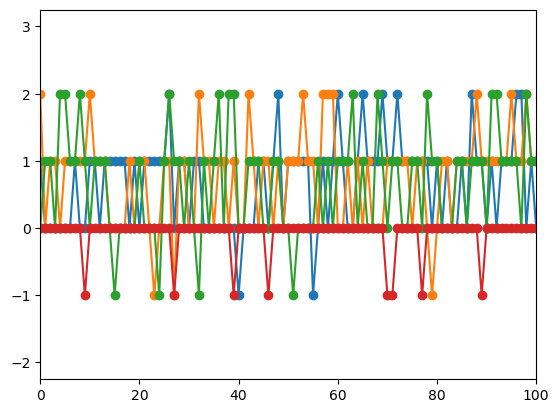

In [8]:
# With Noise (noise generator at level 5)
# Signal frequency = 800 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
Nbelow_lim_800khz = np.load("Nbelow_lim_800khz.npz")
Ndata_below_lim_800khz = Nbelow_lim_800khz["arr_0"]



# At Nyquist limit = 1.6e6
Nny_lim_800khz = np.load("Nny_lim_800khz.npz")
Ndata_ny_lim_800khz = Nny_lim_800khz["arr_0"]



# Above Nyquist Limit (clean) = 2.2e6 
Nabove_lim_800khz = np.load("Nabove_lim_800khz.npz")
Ndata_above_lim_800khz = Nabove_lim_800khz["arr_0"]


# Way Above Nyquist Limit (clean) = 3.2e6 
Nway_above_lim_800khz = np.load("Nway_above_lim_800khz.npz")
Ndata_way_above_lim_800khz = Nway_above_lim_800khz["arr_0"]



# Plotting all three together
plt.figure()
plt.plot(Ndata_below_lim_800khz[7], marker="o") #blue, aliased
plt.plot(Ndata_ny_lim_800khz[7], marker="o") #orange, at limit
plt.plot(Ndata_above_lim_800khz[7], marker="o") #green, clean
plt.plot(Ndata_way_above_lim_800khz[7], marker="o") #red, clean
plt.xlim(0,100)
plt.show()